# Pixel Proficiency 1a
## Fully Connected Networks for Image Classification

*Author: Valentina Staneva*

### Goals:
- Download and understand image data
- Prepare data for training
- Train a fully connected neural network (FCN) with Keras
- Check performance

## Load libraries

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# @title
from tensorflow import keras
from keras.layers import Input, Dense

## Load the MNIST Digits dataset

In [ ]:
# @title
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).

    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.

    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
      from 0 to 255.

    

## Prepare data for training

In [ ]:
# @title
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print("x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
60000 train samples
10000 test samples
x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)


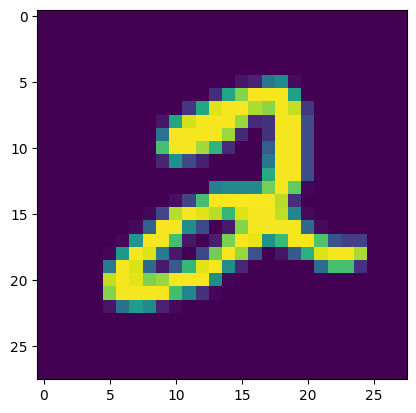

In [ ]:
# display one image
plt.imshow(x_train[5,:,:])

In [ ]:
# display corresponding label (one-hot encoding format)
y_train[5,:]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Flatten the images: 2D -> 1D
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_test.shape, y_test.shape)

(10000, 784) (10000, 10)


## Train a fully connected neural network

We can now build and train our first fully connected neural network in Keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function we want to minimize
- then we fit the model on the training data

In [ ]:
# @title Define a model with 1 hidden layer of 50 units
input_dim = x_train.shape[1]
hidden_dim = 50
output_dim = y_train.shape[1]

model = keras.Sequential()
model.add(Input(shape=(input_dim,)))
model.add(Dense(hidden_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title Define the loss and the evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# @title Fit the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8574 - loss: 0.5405 - val_accuracy: 0.9383 - val_loss: 0.2159
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9410 - loss: 0.2065 - val_accuracy: 0.9522 - val_loss: 0.1716
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9556 - loss: 0.1534 - val_accuracy: 0.9588 - val_loss: 0.1466
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9637 - loss: 0.1253 - val_accuracy: 0.9638 - val_loss: 0.1337
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9685 - loss: 0.1067 - val_accuracy: 0.9630 - val_loss: 0.1301
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9733 - loss: 0.0925 - val_accuracy: 0.9671 - val_loss: 0.1205
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0805 - val_accuracy: 0.9676 - val_loss: 0.1126
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9785 - loss: 0.0748 - 

## Evaluate the trained model



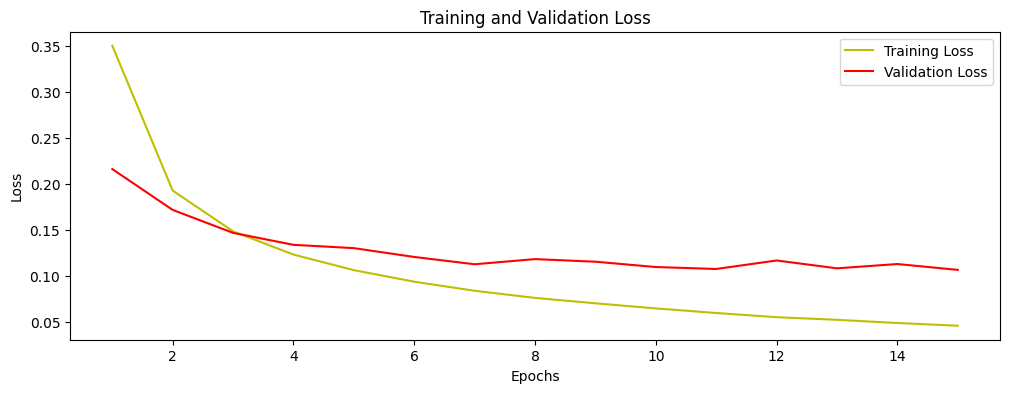

In [ ]:
# @title Training and Validation Loss
epochs = range(1, len(history.history["loss"]) + 1)
plt.figure(figsize=(12, 4))
plt.plot(epochs, history.history["loss"], 'y', label='Training Loss')
plt.plot(epochs, history.history["val_loss"], 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

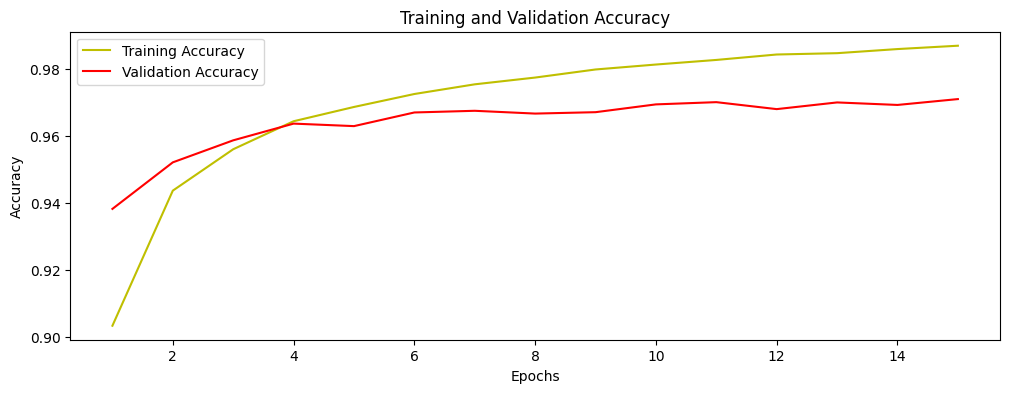

In [ ]:
# @title Training and Validation Accuracy
epochs = range(1, len(history.history["accuracy"]) + 1)
plt.figure(figsize=(12, 4))
plt.plot(epochs, history.history["accuracy"], 'y', label='Training Accuracy')
plt.plot(epochs, history.history["val_accuracy"], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# @title Prediction on test set
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

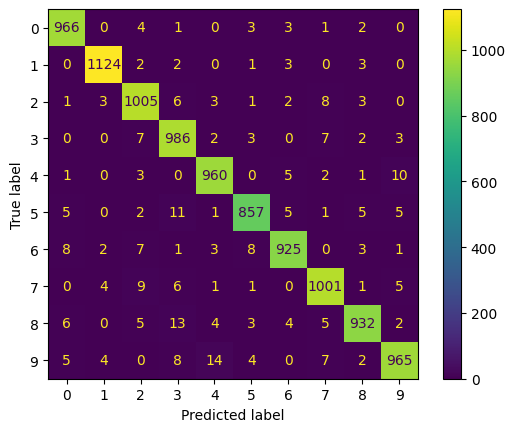

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1),
                                               y_pred.argmax(axis=1),
                                               display_labels=np.arange(10),
                                               #normalize='pred',
                                               )